In [1]:
import matplotlib.pyplot as plt
import numpy as np, pandas as pd
import seaborn as sns

plt. rcParams.update({'figure.figsize':(7,3), 'figure.dpi':120})

In [2]:
df = pd.read_csv(r'https://raw.githubusercontent.com/baothanhquach1661/DataSet/main/cluster_mpg.csv')

In [6]:
# df.describe()
# df.info()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

In [8]:
df_w_dummies = pd.get_dummies(df.drop('name', axis=1))

In [9]:
df_w_dummies.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler
# sqrt( (x1_a - x1_b)² )

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_w_dummies)
# scaled_data

In [16]:
scaled_df = pd.DataFrame(scaled_data, columns=df_w_dummies.columns)
# scaled_df

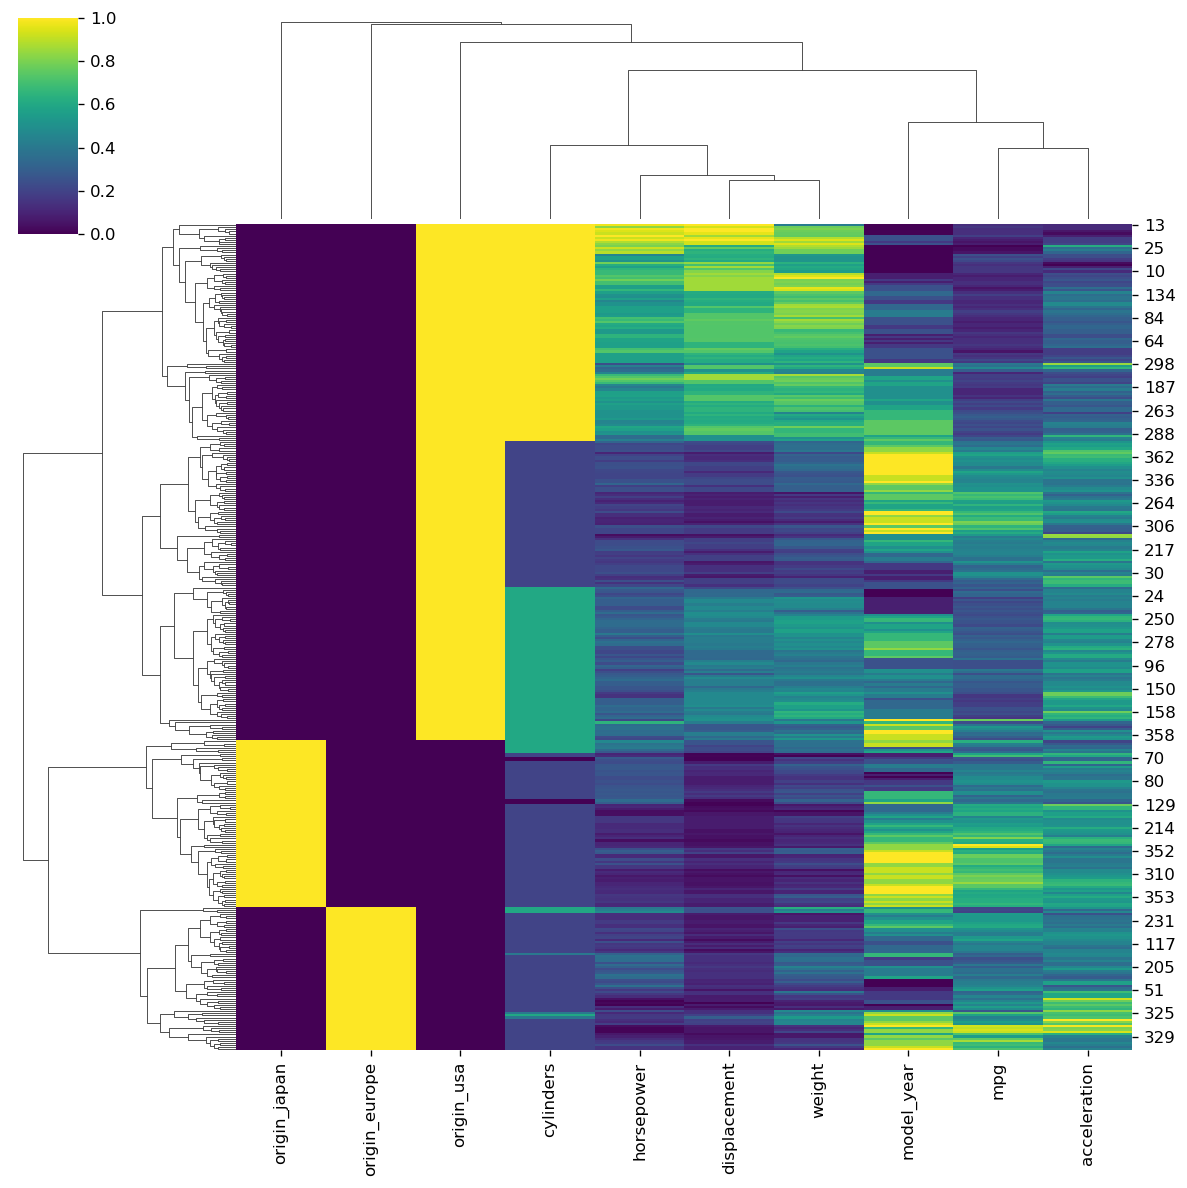

In [19]:
sns.clustermap(scaled_df, cmap='viridis')

<AxesSubplot:>

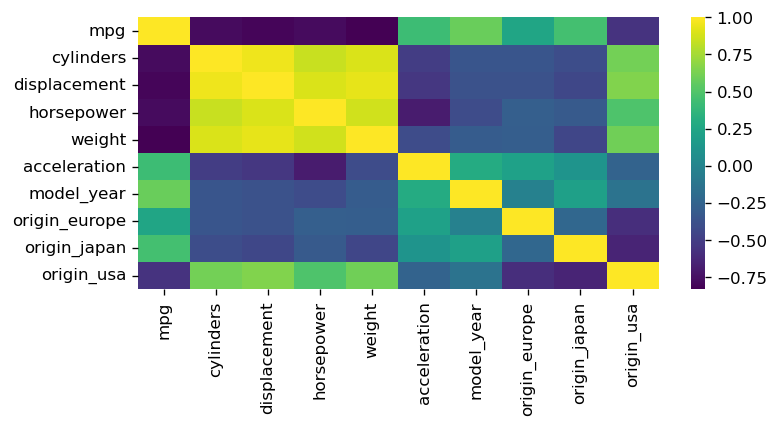

In [21]:
sns.heatmap(scaled_df.corr(), cmap='viridis')

In [22]:
from sklearn.cluster import AgglomerativeClustering

In [23]:
model = AgglomerativeClustering(n_clusters=4)

In [26]:
cluster_labels = model.fit_predict(scaled_df)
# cluster_labels

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

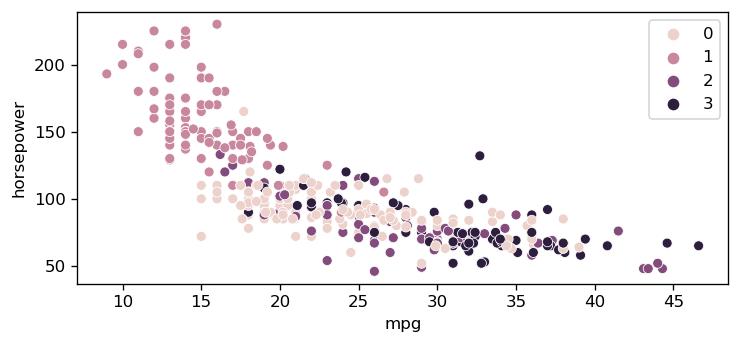

In [32]:
# sns.scatterplot(data=df, x='mpg', y='weight') 1
# sns.scatterplot(data=df, x='mpg', y='displacement') 1
sns.scatterplot(data=df, x='mpg', y='horsepower', hue=cluster_labels)

In [33]:
# max distance possible?
# sqrt(N_features)

In [34]:
len(scaled_df.columns)

10

In [35]:
np.sqrt(10) # max distance between two points (mix/max scaling)

3.1622776601683795

In [36]:
new_model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)

In [40]:
cluster_labels = new_model.fit_predict(scaled_df)
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

In [38]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [39]:
linkage_matrix = hierarchy.linkage(new_model.children_)
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

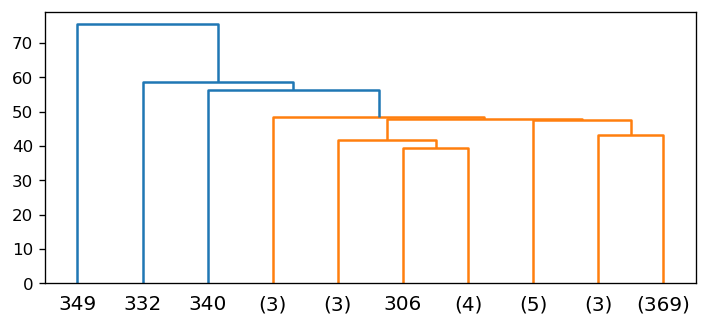

In [42]:
dendro = dendrogram(linkage_matrix, truncate_mode='lastp', p=10)